# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

If you don't mind I'll tex in English not to swich language each time.
Let's look at the 2nd criteria of convexity and strong convexity: \\
Convexity: $∇^2f(x) \succeq 0$

Strong Convexity: $∇^2f(x) \succeq  μI, \space μ > 0$

Gradient: $∇f(x) = \frac12(A + A^T)x - b$ \\
Hessian: $∇^2f(x) = \frac12(A + A^T)$

Not always convex or strong convex, ex. $A = -I ⇒ A + A^T = -2I ≺ 0$

Now let's see the conditions when the problem is considered to be convex:

So, if $\frac12 (A + A^T) \succeq 0$ then the problem is convex (so the eigenvalues of $\frac12 (A + A^T)$ are non-negative)

If $\frac12 (A + A^T) \succeq μI$ then the problem is strong convex (so the eigenvalues of $\frac12 (A + A^T) - μI$ are non-negative)




__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

The strong convexity constant is calculated like this:

$\frac12 (A + A^T) - μI \succeq 0$, which means that eigenvalues are non-negative: $λ(\frac12 (A + A^T) - μI) \geq 0 ⇒ \frac12λ_i(A + A^T) \geq μ \space ∀i \Rightarrow \boxed{\frac12 \min λ(A + A^T) \geq μ}$

Gradient Lipschitz constant:
$∀x, x_0 \space \|∇f(x) - ∇f(x_0)\| ≤ L\|x - x_0\|$

$\| \frac12(A + A^T)x - b - \frac12(A + A^T)x_0 + b \| = \frac12\|(A + A^T)(x - x_0) \| ≤ L\|x - x_0\|$

The function is differentiable, so we can say that $L \leq \sup_x \| ∇^2f(x) \| = \frac12 \| A + A^T \|$

$\boxed {L \leq \frac12 \| A + A^T \|}$

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

In [25]:
#ответ
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

In [26]:
d = 10  #int(input())
mu = 1  #float(input())
L = 100 #float(input())

In [27]:
#I will generate a diagonal matrix

def gen_A(d, mu, L):
    D = np.eye(d)*2*mu
    D[0][0] = 1 + np.sqrt(max((D[0][0])**2, (2*L)**2 - (d - 1)*(2*mu)**2))

    A = 1/2 * D
    return A    

In [28]:
def gen_A(d, mu, L): 
    U = ortho_group.rvs(dim = d)
    A = mu * np.eye(d)
    A[0][0] = L
    A = np.linalg.inv(U) @ A @ U

    return A

__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [29]:
#ответ
def f(A, b, x):
    return 1/2*(x.T @ A @ x - b.T @ x)

In [30]:
def Grad_Descent(n_iter, A, lr, b, x_0):
    points = []
    x_old = x_0
    for i in range(n_iter):
        grad = Get_grad (A, b, x_old)
        
        x_new = x_old - lr*grad
        x_old = x_new 
        points.append(x_old)
    return points

def Get_grad (A, b, x): 
    return 1/2*np.matmul((A + A.T), x) - b

In [31]:
A = gen_A(d, mu, L)
b = np.ones(d)

Grad_Descent(11, A, 0.1, b, b)

[array([-6.80502655, -0.12912661,  0.40752491,  6.81983122, -3.30244742,
         1.83173427, -1.28805027, -0.48192272, -0.93677968,  1.07559981]),
 array([ 63.44021237,  10.03301288,   5.73980068, -45.55864977,
         35.41957938,  -5.65387416,  19.3044022 ,  12.85538173,
         16.49423743,   0.39520151]),
 array([-568.76693784,  -81.42624253,  -42.25068121,  425.84767911,
        -313.07866184,   61.71660171, -166.02767006, -107.18035827,
        -140.38491657,    6.51878618]),
 array([ 5121.09741401,   741.70705618,   389.66365581, -3816.80928074,
         2823.40550915,  -544.61768109,  1501.96098025,   973.14130174,
         1271.52746947,   -48.59347581]),
 array([-46087.68175263,  -6666.49263226,  -3497.56537737,  34367.10335787,
        -25404.95202981,   4912.39086412, -13509.93687256,  -8749.75363834,
        -11435.6840049 ,    447.41688211]),
 array([ 414791.33074712,   60007.30456374,   31487.49592127,
        -309288.11038961,  228650.26582088,  -44200.68604283,
    

__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [32]:
#ответ
#Solution with linalg
x_true = np.linalg.solve(A, b)

In [33]:
n_iter = 10**4
x_0 = np.zeros(d)

points = Grad_Descent(n_iter, A, 1/L, b, x_0)
diff_arr = []
crit_arr = []
crit_2_arr = []
for i in range(n_iter):
    diff_arr.append(points[i] - x_true)
    crit_arr.append(np.linalg.norm(diff_arr[i]))
    crit_2_arr.append(np.abs(f(A, b, points[i]) - f(A, b, x_true)))

print(crit_arr[-1])

2.1258959122726947e-14


Seems that the criteria is quite low, so I dare to say that it converges

__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

In [34]:
def plot_graph(x, y, label, title_, logscale = False):
    plt.plot(x, y, 'c')
    if logscale == True:
        plt.yscale('log')
    plt.xlabel('n_iter')
    plt.ylabel(label)
    plt.title(title_)
    plt.legend()
    plt.show()

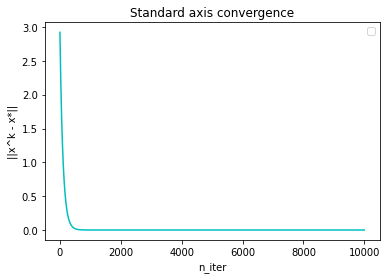

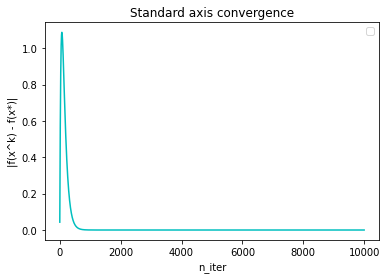

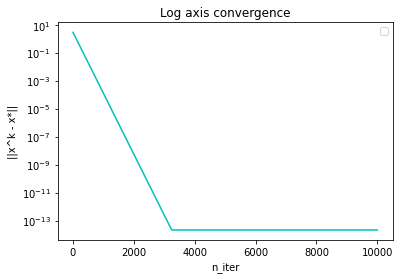

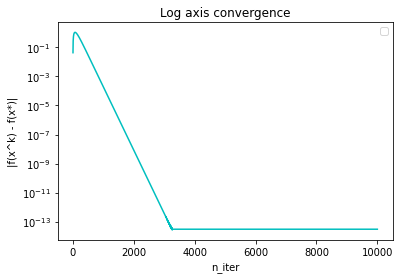

In [35]:
#ответ
x = [i + 1 for i in range(n_iter)]
y1 = crit_arr
y2 = crit_2_arr

plot_graph(x, y1, '||x^k - x*||', 'Standard axis convergence', False)
plot_graph(x, y2, '|f(x^k) - f(x*)|', 'Standard axis convergence', False)
plot_graph(x, y1, '||x^k - x*||', 'Log axis convergence', True)
plot_graph(x, y2, '|f(x^k) - f(x*)|', 'Log axis convergence', True)

We can see that in logarithmic axis we have a straight line, so we have the linear convergence.

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

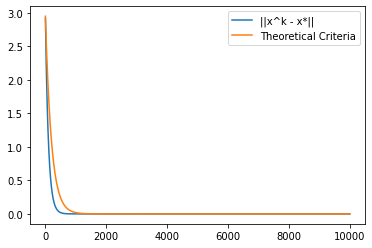

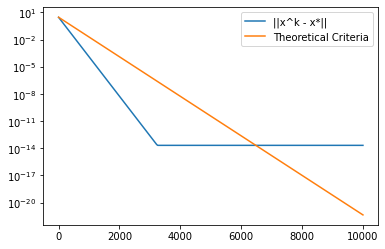

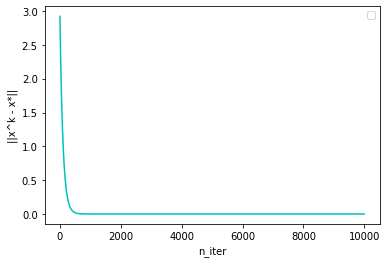

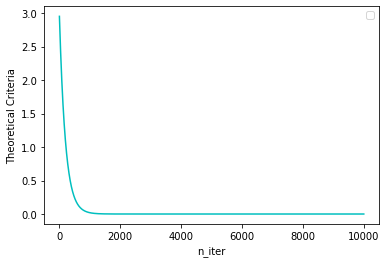

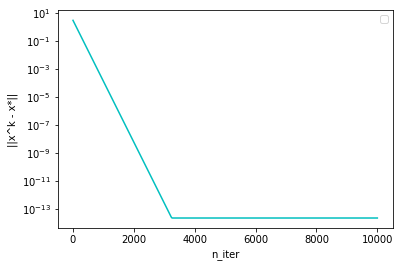

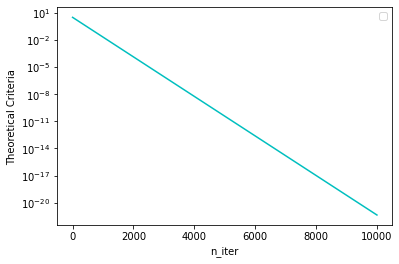

In [36]:
#ответ
#The dependence from seminar: k = L/mu * log(criteria^2/eps^2)
criteria_th = []
criteria_th.append(np.linalg.norm(x_0 - x_true))
for i in range(1, n_iter):
    criteria_th.append(criteria_th[-1] * np.sqrt(1 - mu/L))

X = [i + 1 for i in range(n_iter)]
Y1 = crit_arr
Y2 = criteria_th

plt.plot(X, Y1, label = '||x^k - x*||')
plt.plot(X, Y2, label = "Theoretical Criteria")
plt.legend()
plt.show()

plt.plot(X, Y1, label = '||x^k - x*||')
plt.plot(X, Y2, label = "Theoretical Criteria")
plt.yscale('log')
plt.legend()
plt.show()

plot_graph(X, Y1, '||x^k - x*||', '', False)
plot_graph(X, Y2, "Theoretical Criteria", '', False)
plot_graph(X, Y1, '||x^k - x*||', '', True)
plot_graph(X, Y2, "Theoretical Criteria", '', True)

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

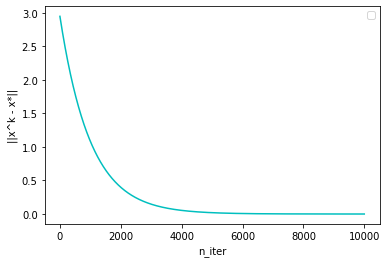

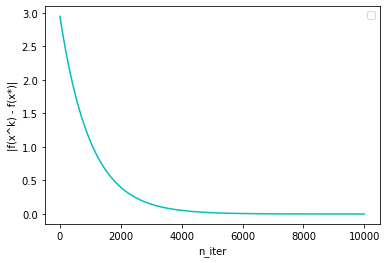

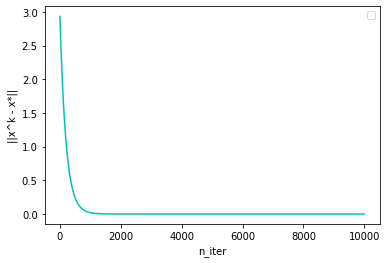

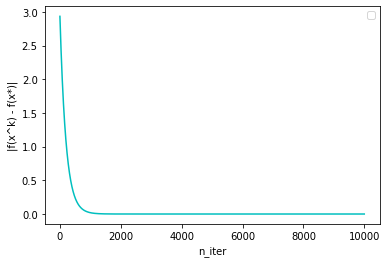

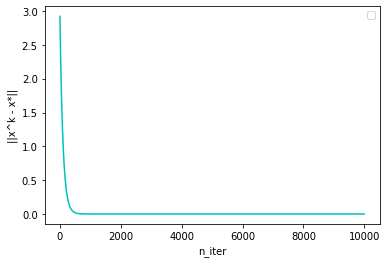

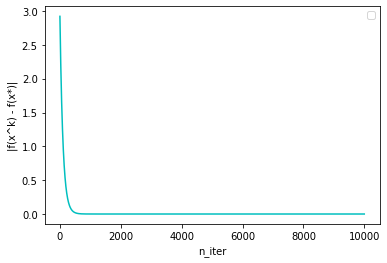

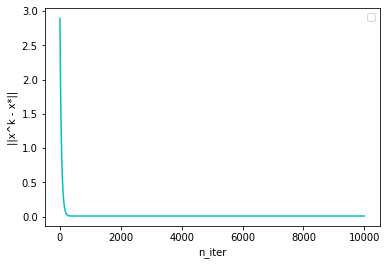

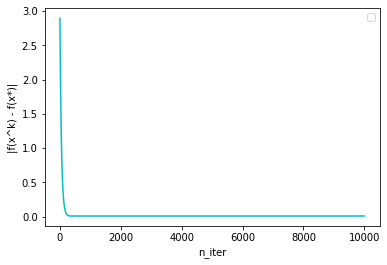

<ipython-input-30-05f04722a460>:13: RuntimeWarning: overflow encountered in matmul
  return 1/2*np.matmul((A + A.T), x) - b
<ipython-input-30-05f04722a460>:7: RuntimeWarning: invalid value encountered in subtract
  x_new = x_old - lr*grad
<ipython-input-29-90b3d45fc32f>:3: RuntimeWarning: overflow encountered in matmul
  return 1/2*(x.T @ A @ x - b.T @ x)
<ipython-input-29-90b3d45fc32f>:3: RuntimeWarning: invalid value encountered in matmul
  return 1/2*(x.T @ A @ x - b.T @ x)


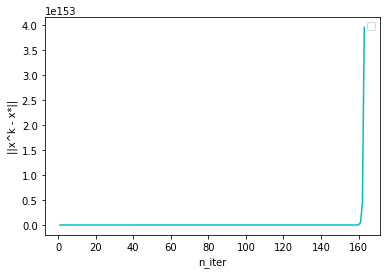

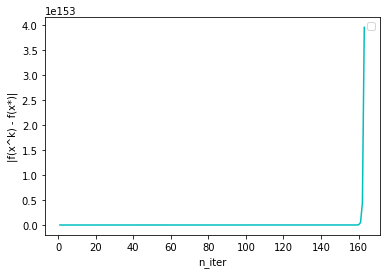

In [37]:
#ответ
for gamma in [0.001, 0.005, 0.01, 0.02, 0.1]: #2/L = 0.02
    points = Grad_Descent(n_iter, A, gamma, b, x_0)
    diff_arr = []
    crit_arr = []
    crit_2_arr = []
    for i in range(n_iter):
        diff_arr.append(points[i] - x_true)
        crit_arr.append(np.linalg.norm(diff_arr[i]))
        crit_2_arr.append(np.abs(f(A, b, points[i]) - f(A, b, x_true)))

    plot_graph(X, crit_arr, '||x^k - x*||', '', False)
    plot_graph(X, crit_arr, '|f(x^k) - f(x*)|', '', False)

As we see after $γ ≥ \frac1L$ there is no convergence



__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

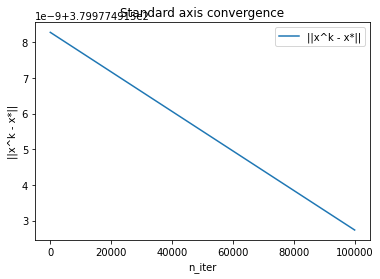

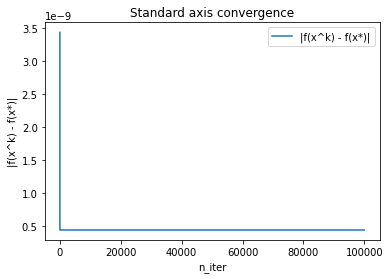

In [38]:
#ответ
d = 10  
mu = 0 
mu_approx = 0.0045
L = 1000
n_iter = 10**5
x_0 = np.random.sample(d)
b = np.random.sample(d)

A_approx = gen_A(d, mu_approx, L)               #generating the approximate matrix
lambda_min = min(np.linalg.eigvalsh(A_approx))  #minimal eigenvalue
x_true_approx = np.linalg.solve(A_approx, b)    #finding approximate solution
A = A_approx - lambda_min*np.eye(d)             #generating A
b = A @ x_true_approx                           #generating b

points = Grad_Descent(n_iter, A, 1/L, b, x_0)
diff_arr = []
crit_arr = []
crit_2_arr = []
for i in range(n_iter):
    diff_arr.append(points[i] - x_true_approx)
    crit_arr.append(np.linalg.norm(diff_arr[i]))
    crit_2_arr.append(np.abs(f(A, b, points[i]) - f(A, b, x_true_approx))) 

x = [i + 1 for i in range(n_iter)]
y1 = crit_arr
plt.plot(x, y1, label = '||x^k - x*||')
plt.xlabel('n_iter')
plt.ylabel('||x^k - x*||')
plt.title('Standard axis convergence')
plt.legend()
plt.show()


y2 = crit_2_arr
plt.plot(x, y2, label = '|f(x^k) - f(x*)|')
plt.xlabel('n_iter')
plt.ylabel('|f(x^k) - f(x*)|')
plt.title('Standard axis convergence')
plt.legend()
plt.show()


__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

No, not everything was great due to singularity of a matrix when $μ = 0$, so I needed to make an approximation of a matrix, therefore there is no convergence in criteria $\|x_k - x^* \|$, but the second criteria shows convergence (in a very strange way)

In [39]:
#ответ
#Added the criteria |f(x_k) - f(x*)| (mostly orange) to the previous parts with the code not to copy-paste

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [40]:
#ответ
#I'll send the bonus task later